# zprof

* Pre-calculated vertical profiles are stored to the ascii table with an extention ".zprof"
    * horizontal integrated variables are stored
    $$ \langle q \rangle_p \equiv \sum_{i,j} q \Theta(p) \Delta x \Delta y $$
    * for "horizontal average", proper normalization should be taken
* "zprof" files are stitched (if they were dumped from each processors) and merged (along t) into a "pickle" file 
* Merged files can be found under the directory "zprof/"

In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy
import cPickle as p

In [3]:
import sys
sys.path.pop(1)
sys.path.append('/tigress/changgoo/pyathena-TIGRESS/src')

#### For example, data files for "MHD_4pc_new" model are

In [4]:
base='/tigress/changgoo/'
id='MHD_4pc_new'

In [5]:
import glob
zprof_fnames=glob.glob(base+id+'/zprof/'+id+'.*.zprof.p')

In [6]:
zprof_fnames.sort()
zprof_fnames

['/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase1.zprof.p',
 '/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase2.zprof.p',
 '/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase3.zprof.p',
 '/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase4.zprof.p',
 '/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase5.zprof.p',
 '/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.whole.zprof.p']

#### Data can be loaded with "pickle.load" function

In [7]:
data=p.load(open(zprof_fnames[-1],'rb'))

#### Data format used "pandas Panel"
* in pandas
    * 1D array --> Series
    * 2D array --> DataFrame
    * 3D array --> Panel
* items: variables
* major_axis: z
* minor_axis: t

In [8]:
data

<class 'pandas.core.panel.Panel'>
Dimensions: 85 (items) x 1792 (major_axis) x 455 (minor_axis)
Items axis: A to MxyR
Major_axis axis: -3582.0 to 3582.0
Minor_axis axis: 0.0 to 466.3601

In [9]:
# if you prefer, you can simply convert it into 3D array
print np.array(data).shape
# or select one item and convert it into 2D array
print np.array(data.d).shape
# you can also access item like a dictionary, which is in fact recommended 
# since method "T" (transpose in DataFrame) overrides variable like "T"
print np.array(data['d']).shape
print np.array(data['T']).shape # for Panel, it is okay 
print np.array(data[:,:,0]['T']).shape # This select "T" variable at t=0
print np.array(data[:,:,0].T).shape # This transpose 2D DataFrame (item,z)

(85, 1792, 455)
(1792, 455)
(1792, 455)
(1792, 455)
(1792,)
(85, 1792)


In [10]:
# For pandas data, you need to be cautious about selecting a slice
# To select 'density' at t=100, you need to appoach using exact axis information
# command below returns error since there is no t=100 in the minor_axis
data['d',:,100]

KeyError: 100.0

In [11]:
# To use more numpy array-like selection, use "iloc" method
print data.minor_axis[100]
data['d'].iloc[:,100]

107.0002


z
-3582.0    58.099073
-3578.0    57.974887
-3574.0    58.078682
-3570.0    58.147586
-3566.0    58.221160
-3562.0    58.301719
-3558.0    58.391473
-3554.0    58.488107
-3550.0    58.589703
-3546.0    58.693227
-3542.0    58.793779
-3538.0    58.885409
-3534.0    58.961441
-3530.0    59.017273
-3526.0    59.048586
-3522.0    59.046699
-3518.0    59.007367
-3514.0    58.938416
-3510.0    58.851524
-3506.0    58.749426
-3502.0    58.625691
-3498.0    58.482461
-3494.0    58.325427
-3490.0    58.162076
-3486.0    57.983723
-3482.0    57.801894
-3478.0    57.700174
-3474.0    57.706941
-3470.0    57.787148
-3466.0    57.903973
             ...    
 3466.0    32.594421
 3470.0    32.624648
 3474.0    32.664399
 3478.0    32.718228
 3482.0    32.788323
 3486.0    32.873586
 3490.0    32.970974
 3494.0    33.076726
 3498.0    33.179657
 3502.0    33.260262
 3506.0    33.300740
 3510.0    33.297864
 3514.0    33.260799
 3518.0    33.196735
 3522.0    33.112153
 3526.0    33.016872
 3530.0    

In [12]:
print data.items

Index([u'A', u'd', u'v1', u'v2', u'v3', u'M1', u'M2', u'M3', u'Ek1', u'Ek2',
       u'Ek3', u'P', u'T', u'dM2', u'dEk2', u'Phie', u'gext', u'dWext',
       u'Phisg', u'gsg', u'dWsg', u'Ber', u'cool', u'heat', u'B1', u'B2',
       u'B3', u'PB1', u'PB2', u'PB3', u'vA1', u'vA2', u'vA3', u'dB1', u'dB2',
       u'dB3', u'dPB1', u'dPB2', u'dPB3', u'dvA1', u'dvA2', u'dvA3', u'S1',
       u'S2', u'S3', u'pA', u'pd', u'pvz', u'pFzd', u'pFzM1', u'pFzM2',
       u'pFzM3', u'pFzE1', u'pFzE2', u'pFzE3', u'pFzP', u'pFzEge', u'pFzEgsg',
       u'pFzEtidal', u'pSzEm1', u'pSzEm2', u'pSzvB1', u'pSzvB2', u'mA', u'md',
       u'mvz', u'mFzd', u'mFzM1', u'mFzM2', u'mFzM3', u'mFzE1', u'mFzE2',
       u'mFzE3', u'mFzP', u'mFzEge', u'mFzEgsg', u'mFzEtidal', u'mSzEm1',
       u'mSzEm2', u'mSzvB1', u'mSzvB2', u'RxyL', u'RxyR', u'MxyL', u'MxyR'],
      dtype='object')


## Variables in zprof data
* All variables use conventional nomenclature, and are in code units
* v2, dM2, dEk2 used perturbed y-velocity (substracted $v_{y0}=-q \Omega x$)
* T is calculated correctly in unit of K with temperature dependent $\mu$
* Phie is the external gravitational potential, defined w.r.t the midplane
* Phisg is the self gravitational potential, defined w.r.t the z-boundaries
* gext and gsg are gravitational acceleration calculated by the centered difference
* dW(ext/sg) = d*g(ext/sg)
* Ber is the Bernoulli parameter (may have a problem since the grav. potentials are not defined with the same reference)
* cool = $\langle n^2\Lambda(T)\rangle$ and heat = $\langle n\Gamma \rangle$
* dB, dPB, and dvA are from "turbulent" magnetic fields
* S(1/2/3) is the poynting flux in each direction
* s(1/2/3) is the passive scalar (not included in some simulations)
* variables start with "p" and "m" are fluxes with "plus" and "minus" vertical velocities, respectively
* Poynting flux is decomposed into 4 terms,
    * p/mSz=p/m(SzEm1+SzEm2+SzvB1+SzvB2)
$$S_z = B_x^2v_z + B_y^2 v_z -B_z B_x v_x - B_z B_y v_y$$
* Rxy(L/R) and Mxy(L/R) are Reynolds and Maxwell stresses calculated at left and right boundaries

#### Example 1: (t,z) images

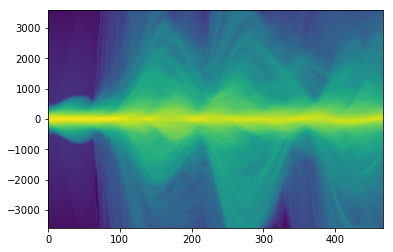

In [13]:
from matplotlib.colors import LogNorm,SymLogNorm,Normalize
z=data.major_axis
t=data.minor_axis
Lx=max(z)-min(z)
trange=max(t)-min(t)
plt.imshow(data.d,norm=LogNorm(),origin='lower',
           extent=[min(t),max(t),min(z),max(z)],aspect='auto')

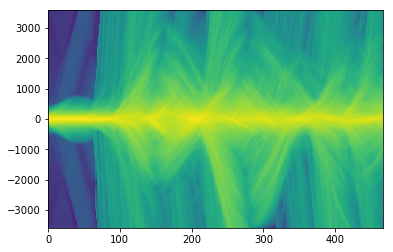

In [14]:
# net outgoing mass flux
plt.imshow(data.pFzd-data.mFzd,norm=LogNorm(),origin='lower',
           extent=[min(t),max(t),min(z),max(z)],aspect='auto')

#### Example 2: time averaged profiles

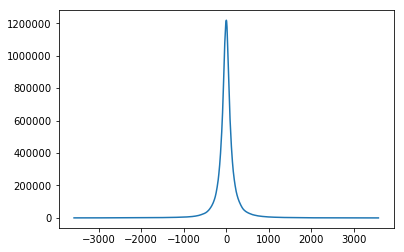

In [15]:
# simple time average for entire period 
dmean = data['d'].mean(axis=1)
plt.plot(dmean)

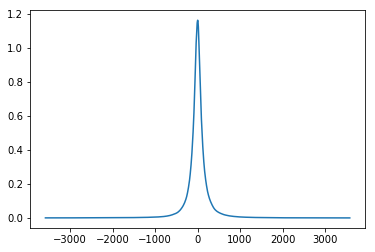

In [16]:
# note that each data is not normalized by its area. Therefore, you need to calculate "area"
Amean = data['A'].mean(axis=1)
plt.plot(dmean/Amean)

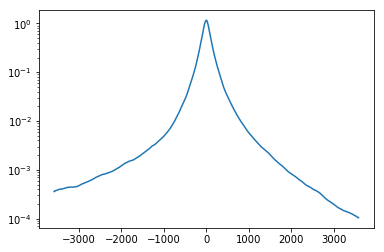

In [17]:
# or you may be able to devide area first
dmean2 = (data['d']/data['A']).mean(axis=1)
plt.semilogy(dmean2)

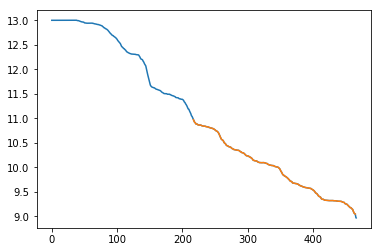

In [18]:
# time average for a selected time
from units import set_units
units=set_units(muH=1.4271)
surf_unit=(units['density']*units['length']).to('Msun/pc^2')
dz=4
surf=(data['d']/data['A']).sum(axis=0)*surf_unit*dz
plt.plot(surf)

trange=(surf>9) & (surf <11)
data_selected=data[:,:,trange]

plt.plot(surf[trange])


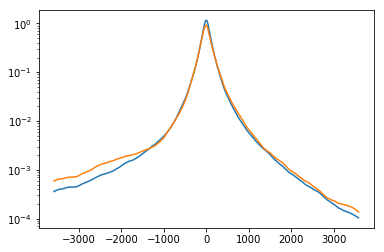

In [19]:
dmean2_selected = (data_selected['d']/data_selected['A']).mean(axis=1)
plt.semilogy(dmean2)
plt.semilogy(dmean2_selected)

#### Example 3: Midplane Pressures

In [20]:
two_phase=np.zeros_like(np.array(data))
for i,f in enumerate(zprof_fnames[:3]):
    print f
    two_phase += np.array(p.load(open(zprof_fnames[1],'rb')))
    

/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase1.zprof.p
/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase2.zprof.p
/tigress/changgoo/MHD_4pc_new/zprof/MHD_4pc_new.phase3.zprof.p


In [21]:
two_phase=pd.Panel(two_phase,items=data.items,major_axis=data.major_axis,minor_axis=data.minor_axis)

In [22]:
zidx= np.abs(z) < 10
data_selected=two_phase[:,zidx,:]

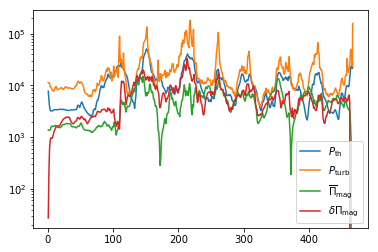

In [23]:
const=astropy.constants
Pok_unit=(units['pressure']/const.k_B).cgs
Pth=(data_selected['P']/data_selected['A']).mean(axis=0)*Pok_unit

Pturb=(2.0*data_selected['Ek3']/data_selected['A']).mean(axis=0)*Pok_unit

oPmag=0.5*(data_selected['B1']/data_selected['A'])**2
oPmag+=0.5*(data_selected['B2']/data_selected['A'])**2
oPmag-=0.5*(data_selected['B3']/data_selected['A'])**2
oPmag=oPmag.mean(axis=0)*Pok_unit

tPmag=(data_selected['dPB1']/data_selected['A']).mean(axis=0)
tPmag+=(data_selected['dPB2']/data_selected['A']).mean(axis=0)
tPmag-=(data_selected['dPB3']/data_selected['A']).mean(axis=0)
tPmag=tPmag*Pok_unit
plt.plot(Pth,label=r'$P_{\rm th}$')
plt.plot(Pturb,label=r'$P_{\rm turb}$')
plt.plot(oPmag,label=r'$\overline{\Pi}_{\rm mag}$')
plt.plot(tPmag,label=r'$\delta{\Pi}_{\rm mag}$')
plt.legend()
plt.yscale('log')